# Analyzing word and document frequency: tf-idf

A central question in text mining and natural language processing is how to quantify what a document is about. Can we do this by looking at the words that make up the document? 

One measure of how important a word may be is its term frequency (tf). 

This is how frequently a word occurs in a document - as we saw in Lab 2. However, there are words in a document that occur many times but may not be important. In English these words are most often things like “the”, “is”, “of”, and so forth. We might take the approach of adding words like these to a list of stop words and removing them before analysis, but it is possible that some of these words might be more important in some documents than others. A list of stop words is not a very sophisticated approach to adjusting term frequency for commonly used words.

Another approach is to look at a term’s inverse document frequency (idf), which decreases the weight for commonly used words and increases the weight for words that are not used very much in a collection of documents. This can be combined with term frequency to calculate a term’s tf-idf (the two quantities multiplied together), the frequency of a term adjusted for how rarely it is used.

The tf-idf statistic is intended to measure how important a word is to a document in a collection (or corpus) of documents, for example, to one novel in a collection of novels or to one website in a collection of websites.

### Preparing data

In [1]:
import requests
import string
import pandas as pd

# Jane Eyre
book_url = 'https://www.gutenberg.org/files/1260/1260-0.txt'
response = requests.get(book_url)
bronte1 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
bronte1 = ''.join(c for c in bronte1 if c in allowed_chars)

# Wuthering Heights
book_url = 'https://www.gutenberg.org/cache/epub/768/pg768.txt'
response = requests.get(book_url)
bronte2 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
bronte2 = ''.join(c for c in bronte2 if c in allowed_chars)

# Vilette
book_url = 'https://www.gutenberg.org/files/9182/9182-0.txt'
response = requests.get(book_url)
bronte3 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
bronte3 = ''.join(c for c in bronte3 if c in allowed_chars)

# Agnes Gray
book_url = 'https://www.gutenberg.org/files/767/767-0.txt'
response = requests.get(book_url)
bronte4 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
bronte4 = ''.join(c for c in bronte4 if c in allowed_chars)

# Create our dataframes
bronte1_lines = bronte1.splitlines()

bronte1_df = pd.DataFrame({
    "line": bronte1_lines,
    "line_number": list(range(len(bronte1_lines)))
})

bronte2_lines = bronte2.splitlines()

bronte2_df = pd.DataFrame({
    "line": bronte2_lines,
    "line_number": list(range(len(bronte2_lines)))
})

bronte3_lines = bronte3.splitlines()

bronte3_df = pd.DataFrame({
    "line": bronte3_lines,
    "line_number": list(range(len(bronte3_lines)))
})

bronte4_lines = bronte4.splitlines()

bronte4_df = pd.DataFrame({
    "line": bronte4_lines,
    "line_number": list(range(len(bronte4_lines)))
})

# We’ll want to know which content comes from which book
bronte1_df = bronte1_df.assign(book = 'Jane Eyre')
bronte2_df = bronte2_df.assign(book = 'Wuthering Heights')
bronte3_df = bronte3_df.assign(book = 'Vilette')
bronte4_df = bronte4_df.assign(book = 'Agnes Grey')

# Finally, we concatenate the books into one dataframe
books = [bronte1_df, bronte2_df, bronte3_df, bronte4_df]
bronte_books_df = pd.concat(books)
bronte_books_df.head()

,line,line_number,book
0,The Project Gutenberg eBook of Jane Eyre by Ch...,0,Jane Eyre
1,,1,Jane Eyre
2,This eBook is for the use of anyone anywhere i...,2,Jane Eyre
3,most other parts of the world at no cost and w...,3,Jane Eyre
4,whatsoever You may copy it give it away or reu...,4,Jane Eyre


In [2]:
# We split the data into words
# We first split the text column into a list of words
bronte_books_df['word'] = bronte_books_df['line'].str.split()

# Explode the words column to create a new row for each word (this creates a separate row for each word from the newly created words list)
bronte_books_df = bronte_books_df.explode('word')

# Reset the index of the dataframe (we want to index each word now)
bronte_books_df = bronte_books_df.reset_index(drop=True)
bronte_books_df.head()

,line,line_number,book,word
0,The Project Gutenberg eBook of Jane Eyre by Ch...,0,Jane Eyre,The
1,The Project Gutenberg eBook of Jane Eyre by Ch...,0,Jane Eyre,Project
2,The Project Gutenberg eBook of Jane Eyre by Ch...,0,Jane Eyre,Gutenberg
3,The Project Gutenberg eBook of Jane Eyre by Ch...,0,Jane Eyre,eBook
4,The Project Gutenberg eBook of Jane Eyre by Ch...,0,Jane Eyre,of


In [3]:
# For our investigations the line & line_number columns will not be necessary, so we will remove them
bronte_books_df = bronte_books_df[['book', 'word']]
bronte_books_df

,book,word
0,Jane Eyre,The
1,Jane Eyre,Project
2,Jane Eyre,Gutenberg
3,Jane Eyre,eBook
4,Jane Eyre,of
...,...,...
585303,Agnes Grey,about
585304,Agnes Grey,new
585305,Agnes Grey,eBooks
585306,Agnes Grey,NaN


### Word counting revisited

In [4]:
# Let's count the occurrences of each word - this is a prerequisite for finding term frequency
count_df = bronte_books_df.groupby('word')['word'].count() # Group by word column, then only keep the word column and perform the counting

# Let's sort by term frequency
count_df_sorted = count_df.sort_values(ascending=False)

pd.set_option('display.max_rows', 10) # You can change the max number of rows that get displayed
count_df_sorted.head(10)

word
the    22423
and    19623
I      18439
to     15784
of     13372
a      12296
in      8107
was     7444
you     6430
her     5981
Name: word, dtype: int64

In [5]:
# The .size() method functions similary, but differs slightly in output format
# .size() also counts null values, which .count() does not
bronte_books_df.groupby(['word']).size().sort_values(ascending=False).reset_index(name='count')

,word,count
0,the,22423
1,and,19623
2,I,18439
3,to,15784
4,of,13372
...,...,...
30146,innocentand,1
30147,Straying,1
30148,innocency,1
30149,innately,1


In [6]:
# Groupby allows grouping based on multiple columns
bronte_books_df.groupby(['word', 'book']).size().sort_values(ascending=False).reset_index(name='count')

,word,book,count
0,the,Vilette,7894
1,the,Jane Eyre,7501
2,I,Jane Eyre,7009
3,and,Jane Eyre,6329
4,and,Vilette,6168
...,...,...,...
54136,gie,Wuthering Heights,1
54137,gies,Wuthering Heights,1
54138,gift,Wuthering Heights,1
54139,giftbringing,Vilette,1


### Aggregate
One useful and elegant way of counting/aggregating data in pandas is by using the .agg() method.


In [7]:
# We group our data by words, then we aggregate and can decide what information we want to display for each column

# setting 'first' for the book column means that in the new dataframe we will display the first book on which each word occurs (in the book column)
# setting 'count' for the word column means that in the new dataframe we will display the count of given word (in the word column)
count_df = bronte_books_df.groupby('word').agg({'book': 'first', 'word': 'count'}) 
count_df

,book,word
word,,
1,Jane Eyre,9
10,Vilette,1
12,Vilette,1
1260,Jane Eyre,1
12600txt,Jane Eyre,1
...,...,...
zigzag,Jane Eyre,2
zigzags,Vilette,1
zle,Vilette,1


In [8]:
# Because we used groupby, the 'word' keyword has become both an index and a column name
# To get rid of any naming problems down the line, we will rename the column name 'word' to 'count'
count_df = count_df.rename(columns={'word': 'count'})

# Sorting values based on count column
count_df.sort_values('count', ascending=False)

,book,count
word,,
the,Jane Eyre,22423
and,Jane Eyre,19623
I,Jane Eyre,18439
to,Jane Eyre,15784
of,Jane Eyre,13372
...,...,...
innocentand,Jane Eyre,1
Straying,Vilette,1
innocency,Vilette,1


Create a dataframe with the following columns: word, book, book_count, total_count where:

### Merging Dataframes

What we want next is to have a dataframe in which we know how many times each word appears per book and how many times it appears in all of the books.

It is sometimes very useful to merge together two dataframes and this is what we're going to do to get our desired dataframe.

In [9]:
count_df_1 = bronte_books_df.groupby(['word', 'book']).size().sort_values(ascending=False).reset_index(name='count') # How many appearances each word has in each book
count_df_1

,word,book,count
0,the,Vilette,7894
1,the,Jane Eyre,7501
2,I,Jane Eyre,7009
3,and,Jane Eyre,6329
4,and,Vilette,6168
...,...,...,...
54136,gie,Wuthering Heights,1
54137,gies,Wuthering Heights,1
54138,gift,Wuthering Heights,1
54139,giftbringing,Vilette,1


In [10]:
count_df_2 = bronte_books_df.groupby(['book']).size().sort_values(ascending=False).reset_index(name='count') # How many words each book has
count_df_2

,book,count
0,Vilette,199399
1,Jane Eyre,192793
2,Wuthering Heights,121108
3,Agnes Grey,72008


In [11]:
book_words = count_df_1.merge(count_df_2, on='book')
book_words.head(10)

,word,book,count_x,count_y
0,the,Vilette,7894,199399
1,and,Vilette,6168,199399
2,I,Vilette,5762,199399
3,of,Vilette,4925,199399
4,to,Vilette,4732,199399
5,a,Vilette,4405,199399
6,in,Vilette,2982,199399
7,was,Vilette,2836,199399
8,her,Vilette,2071,199399
9,it,Vilette,1905,199399


In [12]:
book_words = book_words.rename(columns={'count_x': 'word_appearances_in_book', 'count_y': 'book_total_word_count'}) # Give more meaningful names
book_words.head(10)

,word,book,word_appearances_in_book,book_total_word_count
0,the,Vilette,7894,199399
1,and,Vilette,6168,199399
2,I,Vilette,5762,199399
3,of,Vilette,4925,199399
4,to,Vilette,4732,199399
5,a,Vilette,4405,199399
6,in,Vilette,2982,199399
7,was,Vilette,2836,199399
8,her,Vilette,2071,199399
9,it,Vilette,1905,199399


### Exercise 1 

1. Add a **tf** (term frequency) column to your dataframe.
2. Add a **rank** column to your dataframe.
3. Draw the rank vs term-frequency plot by uncommenting the code below 

Term frequency says how frequently a given word appears in a book. The formula for calculating it is 
    
    term_frequency = word_appearances_in_book / book_total_word_count

E.g. If a word appears 30 times in a book with 1000 words, then the term frequency of that word will be 0.03. (or 3%).

The rank of a word will tell you where your word places itself in the frequency rankings of your book.

i.e. The most common word in your book will have rank 1.
E.g. If the entire text of your book is: "he ate chips, ate pudding and he ate spinach", then you would have:

    ate - rank 1 (count = 3)
    he - rank 2 (count = 2)
    chips - rank 3 (count = 1)
    pudding - rank 3 (count = 1)
    and - rank 3 (count = 1)
    spinach - rank 3 (count = 1)


Hint: you can use the pandas .rank(method='dense', ascending=False) method for obtaining your word rank. 

In [13]:
# Ex 1.1
book_words['tf'] = book_words['word_appearances_in_book'] / book_words['book_total_word_count']
book_words.head(10)

,word,book,word_appearances_in_book,book_total_word_count,tf
0,the,Vilette,7894,199399,0.039589
1,and,Vilette,6168,199399,0.030933
2,I,Vilette,5762,199399,0.028897
3,of,Vilette,4925,199399,0.024699
4,to,Vilette,4732,199399,0.023731
5,a,Vilette,4405,199399,0.022091
6,in,Vilette,2982,199399,0.014955
7,was,Vilette,2836,199399,0.014223
8,her,Vilette,2071,199399,0.010386
9,it,Vilette,1905,199399,0.009554


In [14]:
# Ex 1.2
book_words['rank']=book_words.groupby('book')['word_appearances_in_book'].rank(method='dense', ascending=False)
book_words.head(18883)

,word,book,word_appearances_in_book,book_total_word_count,tf,rank
0,the,Vilette,7894,199399,0.039589,1.0
1,and,Vilette,6168,199399,0.030933,2.0
2,I,Vilette,5762,199399,0.028897,3.0
3,of,Vilette,4925,199399,0.024699,4.0
4,to,Vilette,4732,199399,0.023731,5.0
...,...,...,...,...,...,...
18878,giftbringing,Vilette,1,199399,0.000005,265.0
18879,zurck,Vilette,1,199399,0.000005,265.0
18880,the,Jane Eyre,7501,192793,0.038907,1.0
18881,I,Jane Eyre,7009,192793,0.036355,2.0


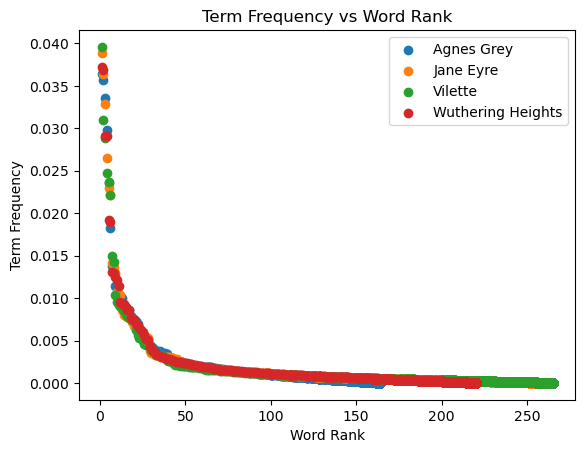

In [15]:
# Ex 1.3
import matplotlib.pyplot as plt

# plot the data
for book, data in book_words.groupby("book"):
    plt.scatter(data["rank"], data["tf"], label=book)

# add labels and legend
plt.title("Term Frequency vs Word Rank")
plt.xlabel("Word Rank")
plt.ylabel("Term Frequency")
plt.legend()

### Excercise 2 - TF-IDF

1. Add a new idf column to your dataframe
2. Add the final tf-idf column to your dataframe
3. Display your dataframe's words in descending order of their tf-idf.

Idf or inverse document frequency is computed as **idf = log(N / n)**

where **N is the total number of documents (books)** in your dataset and **n is the number of documents containing the word**.

Once you have tf and idf, the tf-idf is obtained by simply multiplying the two.

Hint: For 1 the pandas transform function could come in handy.

In [16]:
# Ex 2.1

import math
N = book_words['book'].nunique() # N
n = book_words['word'].value_counts() # n
book_words['idf'] = book_words['word'].apply(lambda x: math.log(N/n[x]))

# Ex 2.2

book_words['tf-idf'] = book_words['tf'] * book_words['idf']

# Ex 2.3

book_words = book_words.sort_values(by='tf-idf', ascending=False)

book_words

,word,book,word_appearances_in_book,book_total_word_count,tf,rank,idf,tf-idf
35012,Heathcliff,Wuthering Heights,413,121108,0.003410,33.0,1.386294,0.004728
35020,Linton,Wuthering Heights,340,121108,0.002807,41.0,1.386294,0.003892
18954,Rochester,Jane Eyre,312,192793,0.001618,71.0,1.386294,0.002243
35021,Catherine,Wuthering Heights,333,121108,0.002750,42.0,0.693147,0.001906
35066,Hareton,Wuthering Heights,164,121108,0.001354,83.0,1.386294,0.001877
...,...,...,...,...,...,...,...,...
41500,violates,Wuthering Heights,1,121108,0.000008,220.0,0.000000,0.000000
21632,concern,Jane Eyre,6,192793,0.000031,256.0,0.000000,0.000000
21633,concealed,Jane Eyre,6,192793,0.000031,256.0,0.000000,0.000000
21636,confusion,Jane Eyre,6,192793,0.000031,256.0,0.000000,0.000000


In [17]:
book_words[['word', 'tf-idf']]

,word,tf-idf
35012,Heathcliff,0.004728
35020,Linton,0.003892
18954,Rochester,0.002243
35021,Catherine,0.001906
35066,Hareton,0.001877
...,...,...
41500,violates,0.000000
21632,concern,0.000000
21633,concealed,0.000000
21636,confusion,0.000000


# Language Models

A language model is a statistical model that can be used to estimate the probability of a sequence of words in a language. It is trained on a corpus of text data, and learns to predict the likelihood of observing a given sequence of words based on the frequency and context of those words in the training data.

Language models can be used for a variety of natural language processing tasks, such as text generation, machine translation, speech recognition, and more.

In [18]:
import nltk
from nltk.corpus import brown
from nltk import FreqDist
nltk.download('brown')

# load the Brown corpus
corpus = brown.words()

[nltk_data] Downloading package brown to /home/andy/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In this example, we're using the Brown corpus from the nltk library, which is a collection of text samples from a wide range of genres, including news, fiction, and academic writing. 

In [19]:
print(corpus[1100:1110]) # Print a sample of 10 words from the corpus

['voters', '.', 'Despite', 'the', 'warning', ',', 'there', 'was', 'a', 'unanimous']


In [20]:
# create a frequency distribution of the words in the corpus
freq_dist = FreqDist(corpus)

# calculate the total number of words in the corpus
total_words = len(corpus)

# calculate the probability of each word in the corpus
word_probs = {word: freq_dist[word] / total_words for word in freq_dist.keys()}
print(word_probs['high']) # Probability of the word 'high' to appear

0.0003970058353829513


### Naive sentence generation

We're going to create a naive function that generates sentences using our language model.

In [21]:
# generate a sentence using the language model
import random

def generate_sentence(word_length = 10):
    sentence = []
    while len(sentence) < word_length:
        word = random.choices(list(word_probs.keys()), list(word_probs.values()))[0]
        sentence.append(word)
    return " ".join(sentence)

In [22]:
print(generate_sentence())

Af on this has Dream-Next '' to between , agent


The sentences generated are likely not going to sound very good, since the model is extremely naive.

All that is happening is that each word in the sentence gets semi-randomly generated with the likelihood of it being chosen depending on its frequency in the Brown corpus.

# N-grams

So far we’ve considered words as individual units, and considered the relationship to their frequency of occurrence. However, many interesting text analyses are based on the relationships between words.
One such relationship is given by n-grams.

N-grams are groups of n consecutive words that appear in a given text corpus.

Bigrams are groups of 2 consecutive words (e.g. she went, he ate, car crashed)

Trigrams are groups of 3 consecutive words (e.g. she went home, he ate a, the car crashed).

In [23]:
# Example of what bigrams look like
bigrams = list(nltk.bigrams(corpus))
bigrams[:10]

[('The', 'Fulton'),
 ('Fulton', 'County'),
 ('County', 'Grand'),
 ('Grand', 'Jury'),
 ('Jury', 'said'),
 ('said', 'Friday'),
 ('Friday', 'an'),
 ('an', 'investigation'),
 ('investigation', 'of'),
 ('of', "Atlanta's")]

In [24]:
# Example of what trigrams look like
trigrams = list(nltk.trigrams(corpus))
trigrams[:10]

[('The', 'Fulton', 'County'),
 ('Fulton', 'County', 'Grand'),
 ('County', 'Grand', 'Jury'),
 ('Grand', 'Jury', 'said'),
 ('Jury', 'said', 'Friday'),
 ('said', 'Friday', 'an'),
 ('Friday', 'an', 'investigation'),
 ('an', 'investigation', 'of'),
 ('investigation', 'of', "Atlanta's"),
 ('of', "Atlanta's", 'recent')]

### Naive next word prediction

Knowing that word relations are pretty important in our language, let's create a function that predicts what the next word in a sentence would be using a simple **bigram** language model. 

In [25]:
from nltk.corpus import brown
import random

# get the words from the Brown corpus
corpus = brown.words()

# create bigrams from the corpus
bigrams = list(nltk.bigrams(corpus))

# calculate the frequency distribution of the bigrams
bigram_freqdist = nltk.FreqDist(bigrams)

# calculate the total number of bigrams in the corpus
total_bigrams = len(bigrams)

# create a function to generate the next word based on the previous word
def generate_next_word_bigram(sentence):
    prev_word = sentence.split()[-1]
    possible_words = {}
    for bigram in bigram_freqdist:
        if bigram[0] == prev_word:
            possible_words[bigram[1]] = bigram_freqdist[bigram] / total_bigrams
    if possible_words:
        return max(possible_words, key=possible_words.get)
    else:
        return None

In [26]:
# predict the next word for a given context
context = "The director"
next_word = generate_next_word_bigram(context)
print(f"The predicted next word for '{context}' is '{next_word}'")

The predicted next word for 'The director' is 'of'


### Exercise 3
1. Create a function that takes as input the number of words and generates a sentence using the previous bigram language model. You can start with a random first word from the brown corpus and then use generate_next_word(sentence) function to help you. 

2. Create a function that predicts the next word of a sentence by looking at the previous two words. This means you will create a trigram language model - use the same Brown corpus as before.

In [27]:
# Ex 3.1 - bigram

def generate_bigram_sentence(length):
    sentence = random.choices(list(word_probs.keys()), list(word_probs.values()))[0]
    words = 1;
    while (words < length):
        next_word = generate_next_word_bigram(sentence)
        if next_word:
            sentence = sentence + ' ' + next_word
            words += 1
    return sentence

generate_bigram_sentence(10)

', and the same time , and the same time'

In [28]:
# Ex 3.2 - trigram

# get the words from the Brown corpus
corpus = brown.words()

# create trigrams from the corpus
trigrams = list(nltk.trigrams(corpus))

# calculate the frequency distribution of the trigrams
trigram_freqdist = nltk.FreqDist(trigrams)

# calculate the total number of trigrams in the corpus
total_trigrams = len(trigrams)

# create a function to generate the next word based on the previous 2 words
def generate_next_word_trigram(sentence):
    word0 = sentence.split()[-2]
    word1 = sentence.split()[-1]
    possible_words = {}
    for trigram in trigram_freqdist:
        if (trigram[0] == word0) and (trigram[1] == word1):
            possible_words[trigram[2]] = trigram_freqdist[trigram] / total_trigrams
    if possible_words:
        return max(possible_words, key=possible_words.get)
    else:
        return None

In [29]:
def generate_trigram_sentence(length):
    sentence = random.choices(list(word_probs.keys()), list(word_probs.values()))[0]
    sentence = sentence + " " + generate_next_word_bigram(sentence)
    words = 2;
    while (words < length):
        next_word = generate_next_word_trigram(sentence)
        if next_word:
            sentence = sentence + ' ' + next_word
            words += 1
    return sentence

generate_trigram_sentence(10)

'something of the United States , and the other hand'

### N-grams in dataframes

Let's get back to our books.
We'll create a dataframe containing information about the bigrams in our books corpus.


In [30]:
# The simplest way to do this would be to create the dataframe directly from bigrams rather than unigrams (single words)
import nltk
nltk.download('punkt')

bronte1_bigrams = list(nltk.bigrams(nltk.word_tokenize(bronte1)))
bronte1_df = pd.DataFrame(bronte1_bigrams, columns=['Word 1', 'Word 2'])

bronte2_bigrams = list(nltk.bigrams(nltk.word_tokenize(bronte2)))
bronte2_df = pd.DataFrame(bronte2_bigrams, columns=['Word 1', 'Word 2'])

bronte3_bigrams = list(nltk.bigrams(nltk.word_tokenize(bronte3)))
bronte3_df = pd.DataFrame(bronte3_bigrams, columns=['Word 1', 'Word 2'])

bronte4_bigrams = list(nltk.bigrams(nltk.word_tokenize(bronte4)))
bronte4_df = pd.DataFrame(bronte4_bigrams, columns=['Word 1', 'Word 2'])


# We’ll want to know which content comes from which book
bronte1_df = bronte1_df.assign(book = 'Jane Eyre')
bronte2_df = bronte2_df.assign(book = 'Wuthering Heights')
bronte3_df = bronte3_df.assign(book = 'Vilette')
bronte4_df = bronte4_df.assign(book = 'Agnes Grey')

# Finally, we concatenate the books into one dataframe
books = [bronte1_df, bronte2_df, bronte3_df, bronte4_df]
bronte_books_df = pd.concat(books)
bronte_books_df.head()

[nltk_data] Downloading package punkt to /home/andy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Word 1,Word 2,book
0,The,Project,Jane Eyre
1,Project,Gutenberg,Jane Eyre
2,Gutenberg,eBook,Jane Eyre
3,eBook,of,Jane Eyre
4,of,Jane,Jane Eyre


### Exercise 4

1. Add a **bigram** column that shows the entire bigrams ("The Project" and "Project Gutenberg" are examples of this column's values), not just the separate words.
2. Clean the dataframe by removing stop words.
3. Display the most frequently occuring 10 bigrams.

In [31]:
# Ex 4.1

bronte_books_df['Bigram']=bronte_books_df['Word 1'] + ' ' + bronte_books_df['Word 2']
bronte_books_df

,Word 1,Word 2,book,Bigram
0,The,Project,Jane Eyre,The Project
1,Project,Gutenberg,Jane Eyre,Project Gutenberg
2,Gutenberg,eBook,Jane Eyre,Gutenberg eBook
3,eBook,of,Jane Eyre,eBook of
4,of,Jane,Jane Eyre,of Jane
...,...,...,...,...
70908,newsletter,to,Agnes Grey,newsletter to
70909,to,hear,Agnes Grey,to hear
70910,hear,about,Agnes Grey,hear about
70911,about,new,Agnes Grey,about new


In [32]:
# Ex 4.2

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

df_filtered = bronte_books_df.copy()
df_filtered = df_filtered[~df_filtered['Word 1'].astype(str).apply(lambda x: x.lower()).isin(stopwords.words('english'))]
df_filtered = df_filtered[~df_filtered['Word 2'].astype(str).apply(lambda x: x.lower()).isin(stopwords.words('english'))]
df_filtered = df_filtered.reset_index(drop=True)
df_filtered


[nltk_data] Downloading package stopwords to /home/andy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word 1,Word 2,book,Bigram
0,Project,Gutenberg,Jane Eyre,Project Gutenberg
1,Gutenberg,eBook,Jane Eyre,Gutenberg eBook
2,Jane,Eyre,Jane Eyre,Jane Eyre
3,Charlotte,Bront,Jane Eyre,Charlotte Bront
4,anyone,anywhere,Jane Eyre,anyone anywhere
...,...,...,...,...
102509,Archive,Foundation,Agnes Grey,Archive Foundation
102510,help,produce,Agnes Grey,help produce
102511,new,eBooks,Agnes Grey,new eBooks
102512,email,newsletter,Agnes Grey,email newsletter


In [33]:
# Ex 4.3

df_filtered['Bigram'].value_counts().head(10)


Mr Rochester           281
Project Gutenbergtm    220
Dr John                126
St John                119
Mr Heathcliff          118
Project Gutenberg      112
Mrs Fairfax            107
Madame Beck            101
Mrs Bretton             92
young lady              74
Name: Bigram, dtype: int64

### Exercise 5

1. Create a dataframe containing the **bigram, word1, word2** and **book** columns for the following 4 books and remove stop words:
        https://www.gutenberg.org/cache/epub/1228/pg1228.txt - On the Origin of Species, by Charles Darwin

        https://www.gutenberg.org/cache/epub/4363/pg4363.txt - Beyond Good and Evil, by Friedrich Nietzsche

        https://www.gutenberg.org/cache/epub/3296/pg3296.txt - The Confessions of Saint Augustine, by Saint Augustine

        https://www.gutenberg.org/files/1661/1661-0.txt - The Adventures of Sherlock Holmes, by Arthur Conan Doyle

2. Display the most frequent 8 words of each book (use word1 column when counting)

3. Display the most relevant 8 words of each book based on tf-idf (use word1 column when counting)

4. Display the most relevant 5 bigrams of each book based on tf-idf

5. Display the most frequent 5 street names found in the entire 4 book corpus. The book they are coming from should also be visible.

6. Choose a fixed word1 of your choice and find the most common 5 bigrams in each book that have word1 equal to the word you chose.




In [86]:
# Ex 5.1

import requests
import string
import pandas as pd

# On the Origin of Species, by Charles Darwin
book_url = 'https://www.gutenberg.org/cache/epub/1228/pg1228.txt'
response = requests.get(book_url)
book1 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
book1 = ''.join(c for c in book1 if c in allowed_chars)

# Beyond Good and Evil, by Friedrich Nietzsche
book_url = 'https://www.gutenberg.org/cache/epub/4363/pg4363.txt'
response = requests.get(book_url)
book2 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
book2 = ''.join(c for c in book2 if c in allowed_chars)

# The Confessions of Saint Augustine, by Saint Augustine
book_url = 'https://www.gutenberg.org/cache/epub/3296/pg3296.txt'
response = requests.get(book_url)
book3 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
book3 = ''.join(c for c in book3 if c in allowed_chars)

# The Adventures of Sherlock Holmes, by Arthur Conan Doyle
book_url = 'https://www.gutenberg.org/files/1661/1661-0.txt'
response = requests.get(book_url)
book4 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
book4 = ''.join(c for c in book4 if c in allowed_chars)


import nltk
nltk.download('punkt')

book1_bigrams = list(nltk.bigrams(nltk.word_tokenize(book1)))
book1_df = pd.DataFrame(book1_bigrams, columns=['Word 1', 'Word 2'])

book2_bigrams = list(nltk.bigrams(nltk.word_tokenize(book2)))
book2_df = pd.DataFrame(book2_bigrams, columns=['Word 1', 'Word 2'])

book3_bigrams = list(nltk.bigrams(nltk.word_tokenize(book3)))
book3_df = pd.DataFrame(book3_bigrams, columns=['Word 1', 'Word 2'])

book4_bigrams = list(nltk.bigrams(nltk.word_tokenize(book4)))
book4_df = pd.DataFrame(book4_bigrams, columns=['Word 1', 'Word 2'])


# We’ll want to know which content comes from which book
book1_df = book1_df.assign(book = 'On the Origin of Species, by Charles Darwin')
book2_df = book2_df.assign(book = 'Beyond Good and Evil, by Friedrich Nietzsche')
book3_df = book3_df.assign(book = 'The Confessions of Saint Augustine, by Saint Augustine')
book4_df = book4_df.assign(book = 'The Adventures of Sherlock Holmes, by Arthur Conan Doyle')

# Finally, we concatenate the books into one dataframe
books4 = [book1_df, book2_df, book3_df, book4_df]
books_df = pd.concat(books4)
books_df.head()

[nltk_data] Downloading package punkt to /home/andy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Word 1,Word 2,book
0,The,Project,"On the Origin of Species, by Charles Darwin"
1,Project,Gutenberg,"On the Origin of Species, by Charles Darwin"
2,Gutenberg,eBook,"On the Origin of Species, by Charles Darwin"
3,eBook,of,"On the Origin of Species, by Charles Darwin"
4,of,On,"On the Origin of Species, by Charles Darwin"


In [35]:
books_df['Bigram']=books_df['Word 1'] + ' ' + books_df['Word 2']

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

books_df_filtered = books_df.copy()
books_df_filtered = books_df_filtered[~books_df_filtered['Word 1'].astype(str).apply(lambda x: x.lower()).isin(stopwords.words('english'))]
books_df_filtered = books_df_filtered[~books_df_filtered['Word 2'].astype(str).apply(lambda x: x.lower()).isin(stopwords.words('english'))]
books_df_filtered = books_df_filtered.reset_index(drop=True)
books_df_filtered

[nltk_data] Downloading package stopwords to /home/andy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word 1,Word 2,book,Bigram
0,Project,Gutenberg,"On the Origin of Species, by Charles Darwin",Project Gutenberg
1,Gutenberg,eBook,"On the Origin of Species, by Charles Darwin",Gutenberg eBook
2,Charles,Darwin,"On the Origin of Species, by Charles Darwin",Charles Darwin
3,anyone,anywhere,"On the Origin of Species, by Charles Darwin",anyone anywhere
4,United,States,"On the Origin of Species, by Charles Darwin",United States
...,...,...,...,...
75573,Archive,Foundation,"The Adventures of Sherlock Holmes, by Arthur C...",Archive Foundation
75574,help,produce,"The Adventures of Sherlock Holmes, by Arthur C...",help produce
75575,new,eBooks,"The Adventures of Sherlock Holmes, by Arthur C...",new eBooks
75576,email,newsletter,"The Adventures of Sherlock Holmes, by Arthur C...",email newsletter


In [36]:
# Ex 5.2

books_counts = books_df_filtered.groupby('book')['Word 1'].value_counts()

for book in books_df_filtered['book'].unique():
    print(f"\nTop {8} words in {book}:")
    print(books_counts[book][:8])


Top 8 words in On the Origin of Species, by Charles Darwin:
Word 1
one          440
species      366
many         361
natural      319
two          286
several      267
may          242
different    224
Name: Word 1, dtype: int64

Top 8 words in Beyond Good and Evil, by Friedrich Nietzsche:
Word 1
one        197
every      120
Project     83
still       78
good        77
new         77
would       73
German      72
Name: Word 1, dtype: int64

Top 8 words in The Confessions of Saint Augustine, by Saint Augustine:
Word 1
Thou      841
Thy       835
one       204
yet       198
unto      189
things    180
Thee      177
God       165
Name: Word 1, dtype: int64

Top 8 words in The Adventures of Sherlock Holmes, by Arthur Conan Doyle:
Word 1
would      179
Miss       169
Mr         149
little     136
could      108
one         99
never       86
Project     84
Name: Word 1, dtype: int64


In [37]:
# Ex 5.3

books_df_data = books_df_filtered.copy()
word_counts = books_df_data.groupby('book')['Word 1'].size()
books_df_data['words_in_book'] = books_df_data['book'].map(word_counts)
books_df_data['word1_app.'] = books_df_data.groupby(['book', 'Word 1'])['Word 1'].transform('count')
books_df_data['tf']=books_df_data['word1_app.'] / books_df_data['words_in_book']

import math
N = books_df_data['book'].nunique()
books_df_data['n'] = books_df_data.groupby('Word 1')['book'].nunique().reindex(books_df_data['Word 1']).values
#print(n)
books_df_data['idf'] = N/books_df_data['n']
books_df_data['idf']= books_df_data['idf'].apply(lambda x: math.log(x))
books_df_data['tf-idf'] = books_df_data['tf'] * books_df_data['idf']

books_df_data = books_df_data.sort_values(by=['book','tf-idf'], ascending=[True,False])
books_df_data=books_df_data.drop(columns=['words_in_book', 'word1_app.', 'tf', 'n', 'idf'])
books_df_data=books_df_data.reset_index(drop=True)
books_df_data

,Word 1,Word 2,book,Bigram,tf-idf
0,dangerous,Perhapses,"Beyond Good and Evil, by Friedrich Nietzsche",dangerous Perhapses,0.002132
1,dangerous,Perhaps,"Beyond Good and Evil, by Friedrich Nietzsche",dangerous Perhaps,0.002132
2,dangerous,manner,"Beyond Good and Evil, by Friedrich Nietzsche",dangerous manner,0.002132
3,refined,taste,"Beyond Good and Evil, by Friedrich Nietzsche",refined taste,0.002132
4,dangerous,afterlife,"Beyond Good and Evil, by Friedrich Nietzsche",dangerous afterlife,0.002132
...,...,...,...,...,...
75573,Archive,Foundation,"The Confessions of Saint Augustine, by Saint A...",Archive Foundation,0.000000
75574,help,produce,"The Confessions of Saint Augustine, by Saint A...",help produce,0.000000
75575,new,eBooks,"The Confessions of Saint Augustine, by Saint A...",new eBooks,0.000000
75576,email,newsletter,"The Confessions of Saint Augustine, by Saint A...",email newsletter,0.000000


In [38]:
for book_name in books_df_data['book'].unique():
    books_df_data1=books_df_data[books_df_data['book']==book_name].drop(columns=['Word 2', 'Bigram'])
    books_df_data1=books_df_data1.drop_duplicates(subset=['Word 1'], keep='first')
    print(books_df_data1.head(8))
    print()

        Word 1                                          book    tf-idf
0    dangerous  Beyond Good and Evil, by Friedrich Nietzsche  0.002132
3      refined  Beyond Good and Evil, by Friedrich Nietzsche  0.002132
60      modern  Beyond Good and Evil, by Friedrich Nietzsche  0.001918
96     thereby  Beyond Good and Evil, by Friedrich Nietzsche  0.001599
126     German  Beyond Good and Evil, by Friedrich Nietzsche  0.001592
198   morality  Beyond Good and Evil, by Friedrich Nietzsche  0.001386
199   nowadays  Beyond Good and Evil, by Friedrich Nietzsche  0.001386
224   European  Beyond Good and Evil, by Friedrich Nietzsche  0.001279

           Word 1                                         book    tf-idf
13007    distinct  On the Origin of Species, by Charles Darwin  0.008412
13203     species  On the Origin of Species, by Charles Darwin  0.007854
13569      plants  On the Origin of Species, by Charles Darwin  0.003820
13571  geological  On the Origin of Species, by Charles Darwin  0.00

In [39]:
# Ex 5.4

for book_name in books_df_data['book'].unique():
    books_df_data1=books_df_data[books_df_data['book']==book_name].drop(columns=['Word 1', 'Word 2'])
    #books_df_data1=books_df_data1.drop_duplicates(subset=['Word 1'], keep='first')
    print(books_df_data1.head(5))
    print()

                                           book               Bigram    tf-idf
0  Beyond Good and Evil, by Friedrich Nietzsche  dangerous Perhapses  0.002132
1  Beyond Good and Evil, by Friedrich Nietzsche    dangerous Perhaps  0.002132
2  Beyond Good and Evil, by Friedrich Nietzsche     dangerous manner  0.002132
3  Beyond Good and Evil, by Friedrich Nietzsche        refined taste  0.002132
4  Beyond Good and Evil, by Friedrich Nietzsche  dangerous afterlife  0.002132

                                              book                 Bigram  \
13007  On the Origin of Species, by Charles Darwin       distinct organic   
13008  On the Origin of Species, by Charles Darwin         distinct parts   
13009  On the Origin of Species, by Charles Darwin       distinct species   
13010  On the Origin of Species, by Charles Darwin  distinct parentstocks   
13011  On the Origin of Species, by Charles Darwin         distinct races   

         tf-idf  
13007  0.008412  
13008  0.008412  
13009  0

In [89]:
# Ex 5.5

books_streets2=books_df[(books_df['Word 1'].astype(str).apply(lambda x: x.lower())=='street') | (books_df['Word 2'].astype(str).apply(lambda x: x.lower())=='street')]
books_streets2

,Word 1,Word 2,book
240,ALBEMARLE,STREET,"On the Origin of Species, by Charles Darwin"
241,STREET,1859,"On the Origin of Species, by Charles Darwin"
14633,the,street,"Beyond Good and Evil, by Friedrich Nietzsche"
14634,street,and,"Beyond Good and Evil, by Friedrich Nietzsche"
25082,the,street,"Beyond Good and Evil, by Friedrich Nietzsche"
25083,street,as,"Beyond Good and Evil, by Friedrich Nietzsche"
55493,the,street,"Beyond Good and Evil, by Friedrich Nietzsche"
55494,street,into,"Beyond Good and Evil, by Friedrich Nietzsche"
506,Baker,Street,"The Adventures of Sherlock Holmes, by Arthur C..."
507,Street,buried,"The Adventures of Sherlock Holmes, by Arthur C..."


In [41]:
# Ex 5.6

books_df_data3=books_df_data[books_df_data['Word 1'].astype(str).apply(lambda x: x.lower())=='good']

for book_name in books_df_data3['book'].unique():
    books_df_data3a=books_df_data3[books_df_data3['book']==book_name].drop(columns=['Word 1', 'Word 2', 'tf-idf'])
    books_df_data3a['appearances']=books_df_data3a.groupby(['book', 'Bigram'])['Bigram'].transform('count')
    books_df_data3a=books_df_data3a.drop_duplicates(subset=['Bigram'], keep='first')
    books_df_data3a=books_df_data3a.sort_values(by=['appearances'], ascending=[False])
    books_df_data3a=books_df_data3a.reset_index(drop=True)
    
    print(books_df_data3a.head(5))
    print()

#find the most common 5 bigrams in each book that have word1 equal to the word you chose.

                                           book           Bigram  appearances
0  Beyond Good and Evil, by Friedrich Nietzsche  good conscience           10
1  Beyond Good and Evil, by Friedrich Nietzsche     good opinion            8
2  Beyond Good and Evil, by Friedrich Nietzsche       good taste            6
3  Beyond Good and Evil, by Friedrich Nietzsche         good man            5
4  Beyond Good and Evil, by Friedrich Nietzsche     good grounds            3

                                          book         Bigram  appearances
0  On the Origin of Species, by Charles Darwin      Good Hope            9
1  On the Origin of Species, by Charles Darwin    good reason            6
2  On the Origin of Species, by Charles Darwin    good chance            3
3  On the Origin of Species, by Charles Darwin      good many            2
4  On the Origin of Species, by Charles Darwin  good evidence            2

                                                book       Bigram  appearances
0